In [ ]:
!pip install hyppo

     |████████████████████████████████| 60 kB 3.6 MB/s 
  Created wheel for hyppo: filename=hyppo-0.2.1-py3-none-any.whl size=98833 sha256=e7bc56776e99e324c9d55bf43b79b2e995c822a824701121a72a4de4783de018
  Stored in directory: /root/.cache/pip/wheels/28/6c/e6/8fd8a0d9d61fd4f2766b0663adeb0313d1adc3d459f2c98aca
Successfully built hyppo


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#Independence Testing

##MGC heat map -- dependency between x and y

In [ ]:
from hyppo.independence import MGC 
from hyppo.tools import w_shaped

In [ ]:
# 1000 samples, 1D x and 1D y with random noise
x, y = w_shaped(n = 1000, p = 1, noise = True)

# MGC map + optimal scale
_, _, mgc_dict = MGC().test(x, y, reps = 0)

In [ ]:
import matplotlib.ticker as ticker
import seaborn as sns

Optimal Scale: [318, 1000]


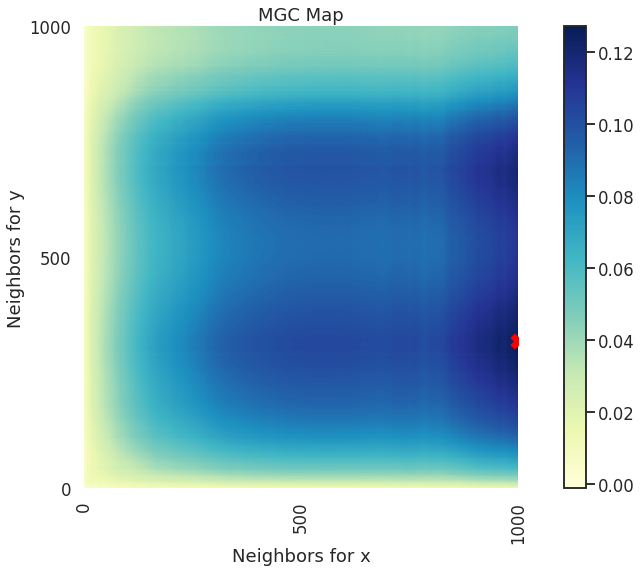

In [ ]:
sns.set(color_codes = True, style = "white", context = "talk", font_scale = 1)
mgc_map = mgc_dict["mgc_map"]
opt_scale = mgc_dict["opt_scale"]  # i.e. maximum smoothed test statistic
print("Optimal Scale:", opt_scale)

fig, (ax, cax) = plt.subplots(
    ncols=2, figsize=(9, 8.5), gridspec_kw={"width_ratios": [1, 0.05]}
)
ax = sns.heatmap(mgc_map, cmap="YlGnBu", ax=ax, cbar=False)
fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
ax.invert_yaxis()
ax.scatter(opt_scale[1], opt_scale[0], marker="X", s=200, color="red")


ax.set_title("MGC Map")
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_xlabel("Neighbors for x")
ax.set_ylabel("Neighbors for y")
ax.set_xticks([0, 500, 1000])
ax.set_yticks([0, 500, 1000])
ax.xaxis.set_tick_params()
ax.yaxis.set_tick_params()
cax.xaxis.set_tick_params()
cax.yaxis.set_tick_params()
plt.show()

## Random Forest Test

In [ ]:
from hyppo.independence import KMERF
from hyppo.tools import cubic

In [ ]:
x, y = cubic(n = 100, p = 5)
_, _, kmerf_dict = KMERF(ntrees = 5000).test(x, y, reps = 0)

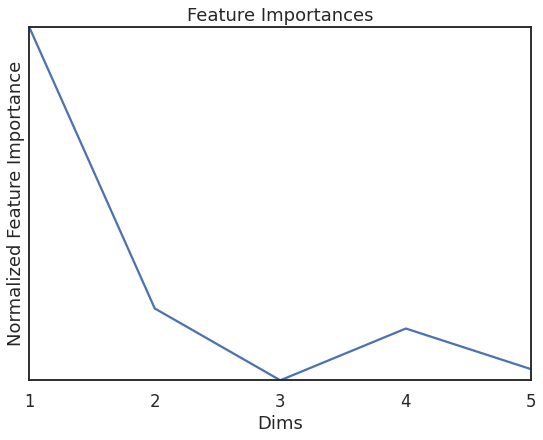

In [ ]:
importances = kmerf_dict['feat_importance']
dims = range(1, 6)

sns.set(color_codes=True, style="white", context = "talk", font_scale=1)

plt.figure(figsize=(9, 6.5))
plt.plot(dims, importances)
plt.xlim([1, 5])
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel("Dims")
plt.ylim([0, 1])
plt.yticks([])
plt.ylabel("Normalized Feature Importance")
plt.title("Feature Importances")
plt.show()

##Maximal Margin Correlation

In [ ]:
from hyppo.tools import w_shaped
x, y = w_shaped(n=100, p=1, noise=True)

In [ ]:
from hyppo.independence import MaxMargin
stat, pvalue = MaxMargin("Hsic").test(x, y)
print(stat, pvalue)

0.06178075992086535 0.007379980738442059


The above is evidence that the random variables X and Y are independent.

# K-sample Testing

In [ ]:
from hyppo.ksample import KSample
from hyppo.tools import rot_ksamp

In [ ]:
sims = rot_ksamp("linear", n=100, p=1, k=3, degree=[60, -60], noise=True)

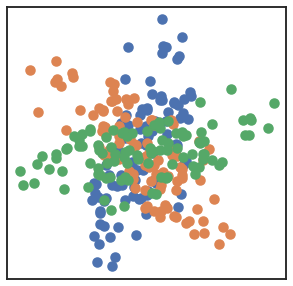

In [ ]:
sns.set(color_codes=True, style="white", context="talk", font_scale=1)

plt.figure(figsize=(5,5))
for sim in sims:
  plt.scatter(sim[:, 0], sim[:, 1])

plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
stat, pvalue = KSample(indep_test="Dcorr").test(*sims)
print(stat, pvalue)

0.042012115482264314 0.00022574802741613396


# Time Series Testing

Simulating an indpendent AR(1) process as an array

In [ ]:
from hyppo.tools import indep_ar

x,y = indep_ar(40)

In [ ]:
# Expect high p value since the simulations are independent
from hyppo.time_series import DcorrX

stat, pvalue, _ = DcorrX(max_lag=0).test(x, y)
print(stat, pvalue)

-0.022854056903545666 0.8131868131868132


In [ ]:
from hyppo.tools import cross_corr_ar
# 40 samples, cross correlated AR, lag = 1

x, y = cross_corr_ar(40)

In [ ]:
# Expect low p value since the simulations are cross correlated
stat, pvalue, _ = DcorrX(max_lag=1).test(x, y)
print(stat, pvalue)

0.1150041470374837 0.02197802197802198


# Discriminability Testing

In [ ]:
! pip install hypothesis

     |████████████████████████████████| 380 kB 8.1 MB/s 


In [ ]:
from hyppo.discrim import DiscrimOneSample
x = np.concatenate([np.zeros((50, 2)), np.ones((50, 2))], axis=0)
y = np.concatenate([np.zeros(50), np.ones(50)], axis=0)

In [ ]:
stat, pvalue = DiscrimOneSample().test(x, y)
print(stat, pvalue)

1.0 0.000999000999000999


In [ ]:
from hyppo.discrim import DiscrimTwoSample
x1 = np.ones((100,2), dtype=float)
x2 = np.concatenate([np.zeros((50, 2)), np.ones((50, 2))], axis=0)
y = np.concatenate([np.zeros(50), np.ones(50)], axis=0)

In [ ]:
discrim1, discrim2, pvalue = DiscrimTwoSample().test(x1, x2, y)
print(discrim1, discrim2, pvalue)

0.5 1.0 0.001
